/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1538: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/tmp/ipykernel_28212/4006468155.py:63: DtypeWarning: Columns (277) have mixed types. Specify dtype option on import or set low_memory=False.
  my_lakes_df = pd.read_csv(my_lakes_csv_path)


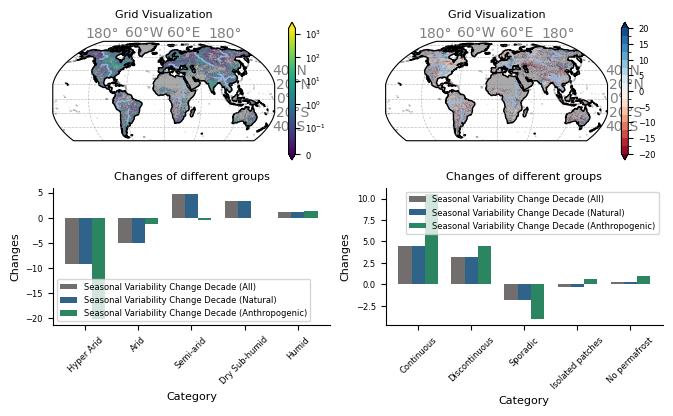

In [2]:
import sys
sys.path.append('../..')
from visualization import plot_grid
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../')
from correlation_analysis import correlation_plots
import numpy as np

ax_mosaic = """
    ab
    cd
"""
projection = ccrs.Robinson()
per_ax_kwargs = {
    'a': {'projection': projection},
    'b': {'projection': projection}
}
fig, axes = plt.subplot_mosaic(ax_mosaic, per_subplot_kw=per_ax_kwargs, figsize=(200/25.4, 100/25.4))

grid_pkl_path = '/WORK/Data/global_lake_area/area_csvs/grids/pkl/grid_all_medium.pkl'
grid_gdf = pd.read_pickle(grid_pkl_path)
grid_gdf['linear_trend_of_standard_deviation_percentage_per_period_median_decade'] = grid_gdf['linear_trend_of_standard_deviation_percentage_per_period_median'] * 10
# convert to true percentage (because currently in area postprocessing, i didn't multiply 100 to columns below)
grid_gdf['mean_seasonal_amplitude_percentage_median'] = grid_gdf['mean_seasonal_amplitude_percentage_median'] * 100
plot_grid(
    grid_gdf=grid_gdf.copy().to_crs(projection),
    projection=projection,
    save_path=None,
    color_column='mean_seasonal_amplitude_sum',
    gridlines=True,
    add_rivers=True,
    use_log_scale_color=True,
    set_global=False,
    extent=[-180, -60, 180, 90],
    cmap='viridis',
    div_colorbar=False,
    show=False,
    ax=axes['a'],
    draw_colorbar=True,
)

plot_grid(
    grid_gdf=grid_gdf.copy().to_crs(projection),
    projection=projection,
    save_path=None,
    color_column='linear_trend_of_standard_deviation_percentage_per_period_median_decade',
    gridlines=True,
    add_rivers=True,
    use_log_scale_color=False,
    set_global=False,
    extent=[-180, -60, 180, 90],
    use_discrete_color=True,
    discrete_bins=[-20, -17.5, -15, -12.5, -10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20],
    show=False,
    ax=axes['b'],
    draw_colorbar=True
)


my_lakes_csv_path = '/WORK/Data/global_lake_area/area_csvs/lakes/csv/lakes_all_with_aridity_and_permafrost_type.csv'
my_lakes_df = pd.read_csv(my_lakes_csv_path)
my_lakes_df['linear_trend_of_standard_deviation_percentage_per_period'] = my_lakes_df['linear_trend_of_standard_deviation_percentage_per_period'] * 10
my_lakes_df['linear_trend_of_standard_deviation_percentage_per_period_natural'] = my_lakes_df.apply(lambda row: row['linear_trend_of_standard_deviation_percentage_per_period'] if row['Lake_type'] == 1 else np.nan, axis=1)
my_lakes_df['linear_trend_of_standard_deviation_percentage_per_period_anthropogenic'] = my_lakes_df.apply(lambda row: row['linear_trend_of_standard_deviation_percentage_per_period'] if row['Lake_type'] != 1 else np.nan, axis=1)
to_plot_column_names = [
    'linear_trend_of_standard_deviation_percentage_per_period',
    'linear_trend_of_standard_deviation_percentage_per_period_natural',
    'linear_trend_of_standard_deviation_percentage_per_period_anthropogenic'
]
to_plot_column_labels = [
    'Seasonal Variability Change Decade (All)',
    'Seasonal Variability Change Decade (Natural)',
    'Seasonal Variability Change Decade (Anthropogenic)'
]
to_plot_column_colors = [
    '#716e6d',
    '#30638a',
    '#2a8560'
]
agg_to_bar_stat_types = [
    'median',
    'median',
    'median'
]
to_group_by_column_name = 'ari_ix_uav'
group_bins = [0, 0.03, 0.2, 0.5, 0.65, np.inf]
group_labels = ['Hyper Arid', 'Arid', 'Semi-arid', 'Dry Sub-humid', 'Humid']

correlation_plots.bar_plot_of_different_groups(
    to_plot_df=my_lakes_df,
    to_plot_column_names=to_plot_column_names,
    to_plot_column_colors=to_plot_column_colors,
    to_plot_column_labels=to_plot_column_labels,
    agg_to_bar_stat_types=agg_to_bar_stat_types,
    to_group_by_column_name=to_group_by_column_name,
    group_bins=group_bins,
    group_labels=group_labels,
    bar_width=0.25,
    xticklabel_rotation=45,
    ax=axes['c'],
    show_plot=False
)


to_group_by_column_name = 'EXTENT'
my_lakes_df[to_group_by_column_name] = my_lakes_df[to_group_by_column_name].astype(str)
category_values = ['C', 'D', 'S', 'I', 'nan']
group_labels = ['Continuous', 'Discontinuous', 'Sporadic', 'Isolated patches', 'No permafrost']

correlation_plots.bar_plot_of_different_groups(
    to_plot_df=my_lakes_df,
    to_plot_column_names=to_plot_column_names,
    to_plot_column_colors=to_plot_column_colors,
    to_plot_column_labels=to_plot_column_labels,
    agg_to_bar_stat_types=agg_to_bar_stat_types,
    to_group_by_column_name=to_group_by_column_name,
    group_values=category_values,
    group_labels=group_labels,
    bar_width=0.25,
    xticklabel_rotation=45,
    ax=axes['d'],
    show_plot=False
)

fig.savefig('grid_wise_plotting_selected_with_colorbar.pdf', bbox_inches='tight')